Import Libraries

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV

In [14]:
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

Define layer name

In [15]:
folder_name = 'label_09'

Label 01

In [16]:
cols = list(pd.read_csv(f"drive/MyDrive/ML Project/train.csv", nrows=1))
train_data = pd.read_csv(f"drive/MyDrive/ML Project/train.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_2"]])
train_data.shape

(28520, 769)

Handling missing values

In [17]:
train_data = train_data.dropna()
print(train_data.shape)
train_data.head()

(28520, 769)


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_760,feature_761,feature_762,feature_763,feature_764,feature_765,feature_766,feature_767,feature_768,label_4
0,0.019301,0.059756,0.081375,0.057481,-0.068440,-0.165913,0.035643,-0.091138,0.021688,0.057158,...,0.124449,0.124765,-0.235671,-0.035576,0.127319,0.098128,-0.058787,0.100971,-0.047754,6
1,0.049741,0.090030,0.035118,-0.013676,-0.194317,-0.101763,0.085875,-0.081317,0.112418,0.120523,...,0.186260,0.085101,-0.365903,0.020538,0.058968,0.029803,0.111324,0.036727,0.031927,6
2,0.019212,0.087779,0.093907,-0.033738,-0.141409,-0.062881,-0.071402,-0.006599,0.020372,-0.027777,...,0.019542,0.144256,-0.123374,0.119645,-0.040861,0.000548,-0.061003,-0.042450,0.063340,6
3,0.070283,0.049040,0.042126,0.122637,-0.056964,-0.113700,0.108454,0.051336,0.086610,0.141578,...,0.117235,-0.038984,-0.028714,-0.124494,-0.169225,-0.046391,0.148787,0.014616,-0.140644,6
4,0.028864,0.165634,0.016302,0.036117,-0.028871,-0.147748,0.053180,0.025071,-0.004200,-0.022183,...,0.029716,0.077643,-0.182132,-0.124862,0.044907,0.084005,-0.038450,0.084371,-0.072146,6


numbers of missing values neglegible

Import test data set

In [18]:
cols = list(pd.read_csv(f"drive/MyDrive/ML Project/valid.csv", nrows=1))
valid_data = pd.read_csv(f"drive/MyDrive/ML Project/valid.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_2"]])
valid_data.shape

(750, 769)

Handling missing values

In [19]:
valid_data = valid_data.dropna()
valid_data.shape

(750, 769)

In [20]:
#features
X_train = train_data.iloc[:,:-1]
Y_train = train_data.iloc[:,-1]
X_valid = valid_data.iloc[:,:-1]
Y_valid = valid_data.iloc[:,-1]

Standarization

In [21]:
robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_scaler = robust_scaler.transform(X_train)
X_valid_scaler = robust_scaler.transform(X_valid)

Dimensionality reduction

In [22]:
pca = PCA(0.98)
pca = pca.fit(X_train_scaler)

X_train_pca = pca.transform(X_train_scaler)
X_valid_pca = pca.transform(X_valid_scaler)
X_train_pca.shape

(28520, 466)

oversampling and undersampling

<Axes: title={'center': 'Count of Label_2'}>

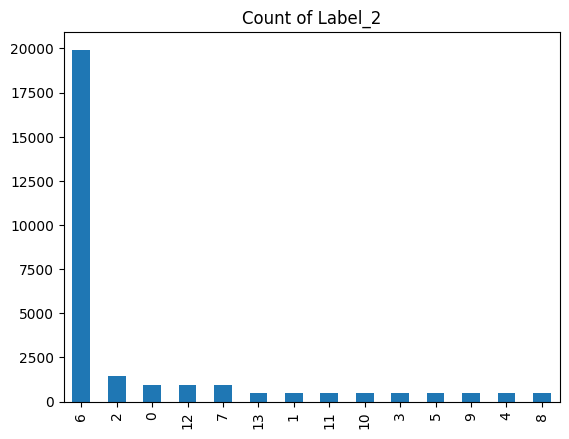

In [23]:
train_data['label_4'].value_counts().plot(kind='bar',title='Count of Label_2')

(279130, 466)


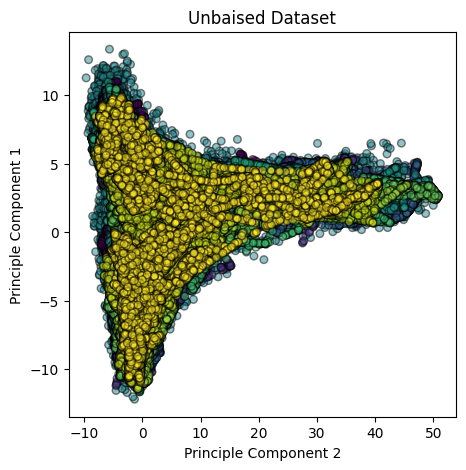

In [ ]:
from imblearn.combine import SMOTETomek
import matplotlib.pyplot as plt
# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smt, Y_train_smt = smotetomek.fit_resample(X_train_pca, Y_train)
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_smt, Y_train_smt, ax, title='Unbaised Dataset')
print(X_train_smt.shape)

Using SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
# svc_init = SVC()
# svc_init.fit(X_train_scaler,Y_train)
# svc_predicted = svc_init.predict(X_valid_scaler)
# accuracy_score(Y_valid,svc_predicted)

After feature engineering

In [ ]:
svc = SVC()
svc.fit(X_train_smt, Y_train_smt)
svc_predicted = svc.predict(X_valid_pca)
accuracy_score(Y_valid,svc_predicted)

Hyper Parameter tuning without dimentionality reduction

In [ ]:
cols = list(pd.read_csv(f"drive/MyDrive/ML Project/test.csv", nrows=1))
test_data = pd.read_csv(f"drive/MyDrive/ML Project/test.csv",usecols =[i for i in cols if i not in ["label_1", "label_3", "label_2"]])
#features
X_test = test_data.iloc[:,1:]
X_test.head()

X_test_scaler = robust_scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaler)

grid_predictions = svc.predict(X_test_pca)
grid_predictions

In [ ]:
size = grid_predictions.size
index = []
for i in range(size):
    index.append(i+1)
data = {
    'ID': index,
    'label_4': grid_predictions
}
df = pd.DataFrame(data)
df.to_csv('drive/MyDrive/ML Project/0-4.csv', index=False)